In [1]:
#Import Libraries
import numpy as np
import sklearn
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [2]:
#Read the data set
df = pd.read_csv('Preprocessed_Data.csv')

In [3]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features

y=df['pets_allowed']  # Labels

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25) # 70% training and 30% test

In [5]:
#Import Algorithm Libararies
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

In [7]:
from sklearn.model_selection import train_test_split

models = {}

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

#Voting
from sklearn.ensemble import VotingClassifier
models['Voting-Classifier'] = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Neural Network

from sklearn.neural_network import MLPClassifier
models['Neural Network'] = MLPClassifier()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\Cloud Solution\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#Accuracy , Precision and Recall values for all models
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy' ] = accuracy.values()
df_model['Precision' ] = precision.values()
df_model['Recall' ] = recall.values()

df_model

,Accuracy,Precision,Recall
Decision Tree,0.873762,0.924142,0.913398
Random Forest,0.890391,0.949011,0.912540
Naive Bayes,0.227980,0.000463,0.666667
K-Nearest Neighbor,0.840575,0.916177,0.881949
Voting-Classifier,0.868040,0.976613,0.868784
Neural Network,0.670887,0.771871,0.795789


Text(27.0, 0.5, 'Evaluation Rate')

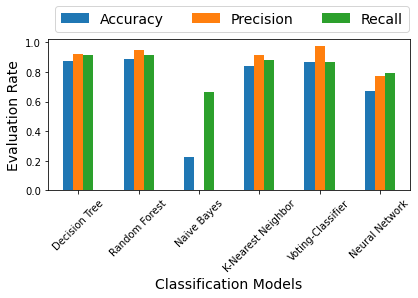

In [10]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

plt.xlabel("Classification Models",size=14)
plt.ylabel("Evaluation Rate",size=14)

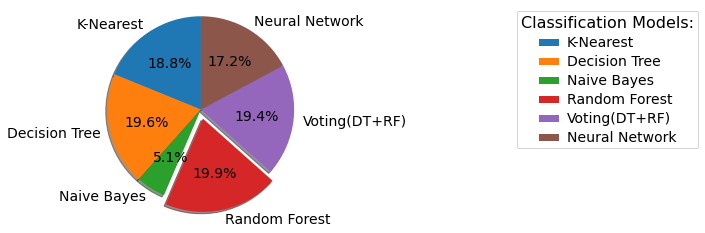

In [11]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'K-Nearest', 'Decision Tree', 'Naive Bayes', 'Random Forest','Voting(DT+RF)','Neural Network'
sizes = [84.5296,87.7803,22.8516,89.2215,87.0150,77.0518]
explode = (0,0,0,0.1,0,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14} )

legend = plt.legend(labels ,title = "Classification Models:" ,bbox_to_anchor=(2,1))

legend.get_title().set_fontsize('16') #legend 'Title' fontsize
plt.setp(plt.gca().get_legend().get_texts(), fontsize='14') #legend 'list' fontsize

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()